# Haberman's Survival Exploratory Data Analysis (EDA)

## Objectif

#### Classify new patients according to available categories.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from statsmodels import robust

plt.style.use('fivethirtyeight')
%matplotlib inline

## Reading the data

In [2]:
haberman = pd.read_csv('haberman.csv')
haberman.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
# The dataset don't have a columns name.
# let's fix that

haberman = pd.read_csv('haberman.csv',
                      names=['age','op_year','nodes', 'surv_status'])
haberman.head()

,age,op_year,nodes,surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
# check types of columns
haberman.dtypes

age            int64
op_year        int64
nodes          int64
surv_status    int64
dtype: object

In [5]:
#how many points and features?
haberman.shape

(306, 4)

In [6]:
# how many points in each category?
haberman.loc[:, 'surv_status'].value_counts(normalize=True).round(2)

1    0.74
2    0.26
Name: surv_status, dtype: float64

In [7]:
# Dataset is imbalanced with ration 74:26

In [8]:
# let's give a labels for surv_status column
haberman.loc[:, 'surv_status'] = haberman.loc[:, 'surv_status'].map({1:'5+', 2:'5-'})
haberman.head()

,age,op_year,nodes,surv_status
0,30,64,1,5+
1,30,62,3,5+
2,30,65,0,5+
3,31,59,2,5+
4,31,65,4,5+


## Missing data detection

<AxesSubplot:>

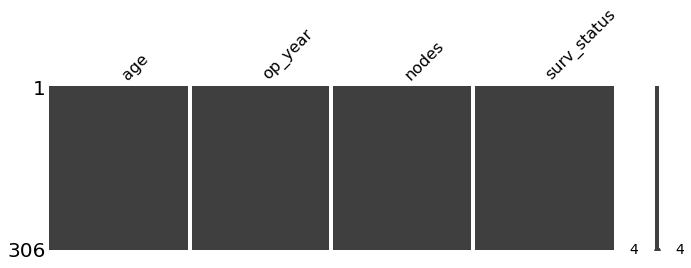

In [9]:
msno.matrix(haberman, figsize=(10,3))

dataset is without missing values

## Univariate analysis

### 2D - Scatter Plot

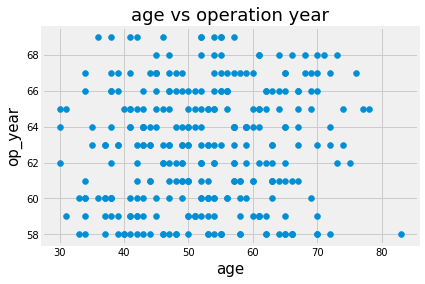

In [10]:
plt.scatter(haberman.loc[:,'age'], haberman.loc[:,'op_year'])

plt.xlabel('age', fontsize=15)
plt.ylabel('op_year', fontsize=15)

plt.title('age vs operation year', fontsize=18)

plt.show();

No clear trend or separation between categories

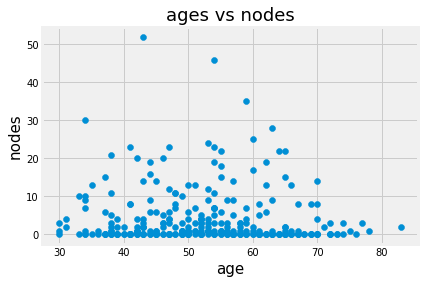

In [11]:
plt.scatter(haberman.loc[:,'age'], haberman.loc[:,'nodes'])

plt.xlabel('age', fontsize=15)
plt.ylabel('nodes', fontsize=15)

plt.title('ages vs nodes', fontsize=18)

plt.show()

There is a certain separation which is weak, let's try to add the colors

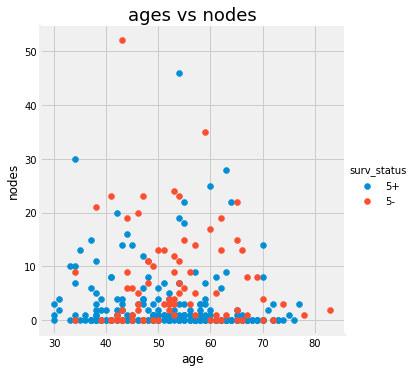

In [12]:
sns.FacetGrid(haberman, hue='surv_status', height=5)\
.map(plt.scatter, 'age', 'nodes')\
.add_legend()

plt.title('ages vs nodes', fontsize=18)
plt.show()

In [13]:
# let's see what pair plot looks like

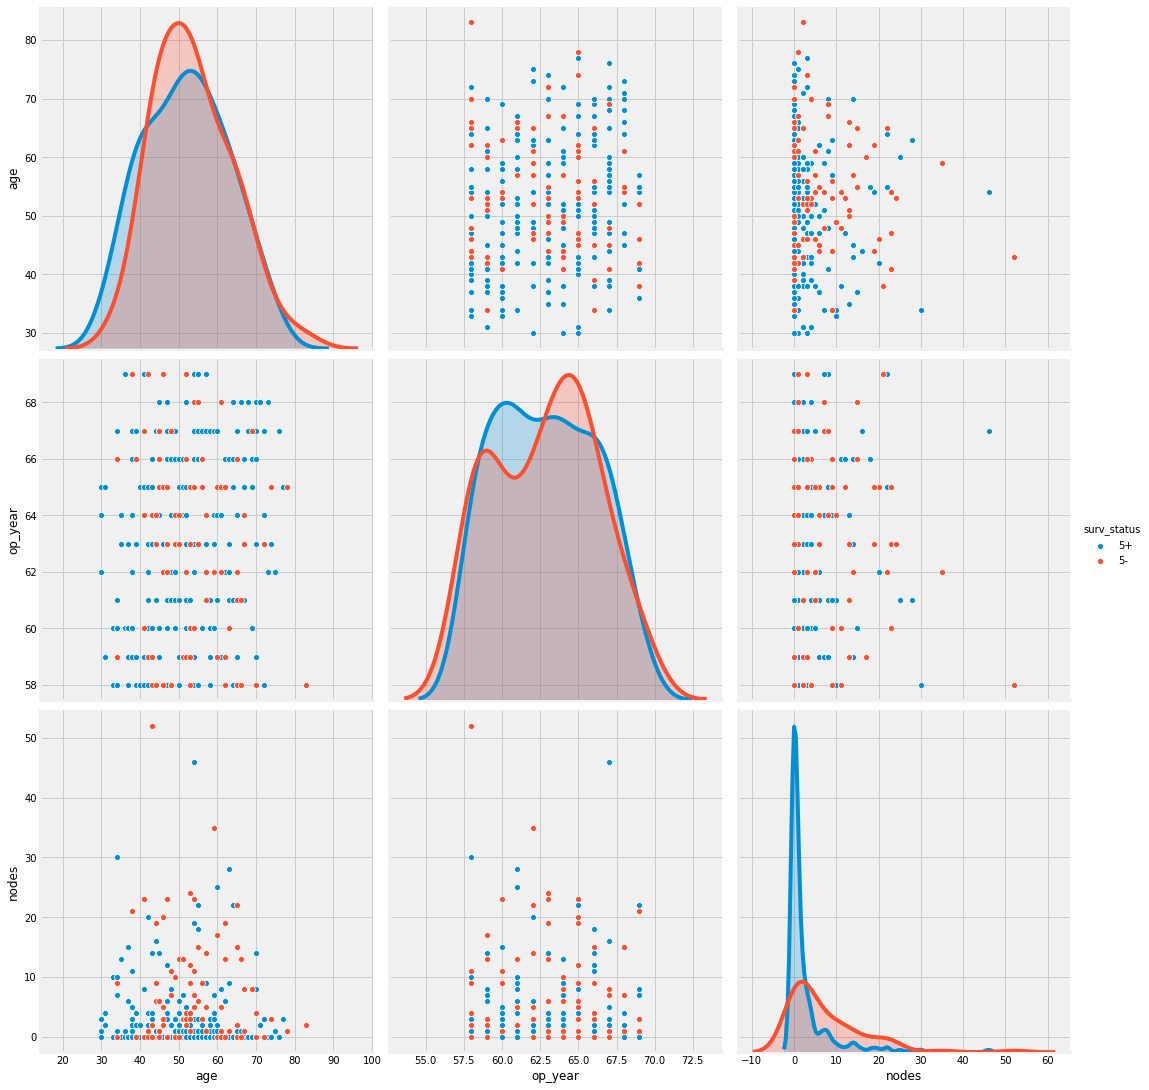

In [14]:
sns.pairplot(haberman, hue='surv_status', height=5)
plt.show()

Although age vs nodes has a weak distinction of categories but it remains the most visible among the other cases.

#### Observations

* The classification with survival status is sever
* The is an overlap betwwen 5+ an 5- categories
* The choice of age and nodes features still the best

### Histogram, PDF, CDF

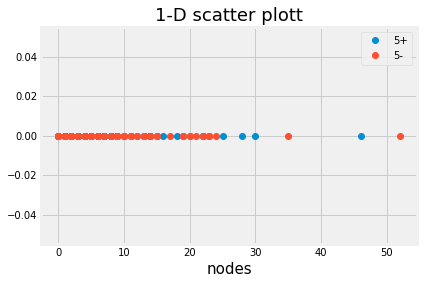

In [15]:
# let's check the 1-D

survived = haberman.loc[haberman.loc[:, 'surv_status']=='5+',:]
died = haberman.loc[haberman.loc[:,'surv_status']=='5-',: ]

surv_0 = np.zeros_like(survived.loc[:,'nodes'])
died_0 = np.zeros_like(died.loc[:,'nodes'])


plt.plot(survived.loc[:,'nodes'], surv_0, 'o', label='5+')
plt.plot(died.loc[:, 'nodes'], died_0, 'o', label='5-')


plt.xlabel('nodes', fontsize=15)
plt.title('1-D scatter plott',fontsize=18)
plt.legend()

plt.show()

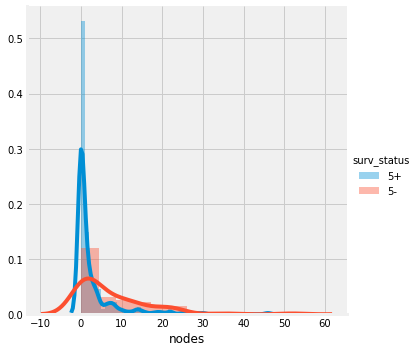

In [16]:
sns.FacetGrid(haberman, hue='surv_status', height=5)\
.map(sns.distplot, 'nodes').add_legend()

plt.show()

* Based on the graph we can say that the group 5- after 30 nodes they died.
* The 5+ group have less than 5% chance to stay alive.

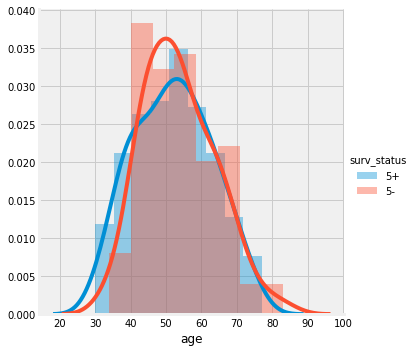

In [17]:
sns.FacetGrid(haberman, hue='surv_status', height=5)\
.map(sns.distplot, 'age').add_legend()

plt.show()

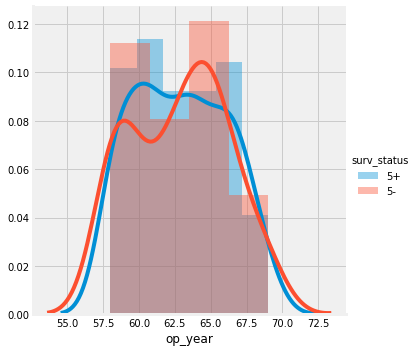

In [18]:
sns.FacetGrid(haberman, hue='surv_status', height=5)\
.map(sns.distplot, 'op_year').add_legend()

plt.show()

* the graphs according to age and age_op represent too much overlap.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]


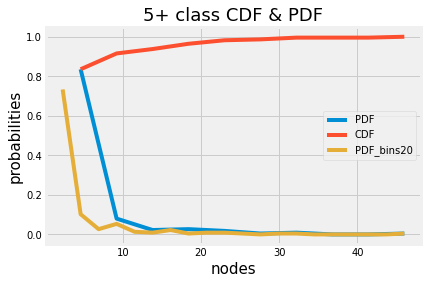

In [19]:
# plot PDF and CDF 5+
counts, bin_edges = np.histogram(survived.loc[:,'nodes'], bins=10, 
                                density=True)

pdf = counts / sum(counts)
cdf = np.cumsum(pdf)
print(pdf)
print(cdf)

plt.plot(bin_edges[1:], pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')

counts, bin_edges = np.histogram(survived.loc[:,'nodes'], bins=20, 
                                density=True)
pdf = counts / sum(counts)
plt.plot(bin_edges[1:], pdf, label='PDF_bins20')

plt.xlabel('nodes', fontsize=15)
plt.ylabel('probabilities', fontsize=15)
plt.title('5+ class CDF & PDF',fontsize=18)
plt.legend()
plt.show()

* It is noted that approximately 82% of survivors have less than 5 to 7 nodes.

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


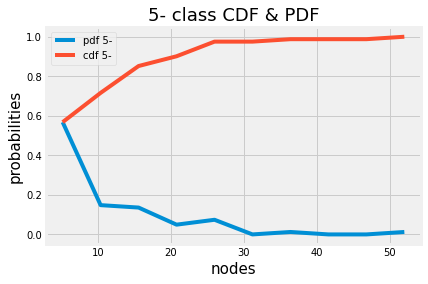

In [20]:
# plot PDF and CDF 5-

counts, bin_edges = np.histogram(died.loc[:, 'nodes'], bins=10,
                                density=True)
pdf = counts / (sum(counts))
cdf = np.cumsum(pdf)
print(pdf)
print(cdf)

plt.plot(bin_edges[1:], pdf, label='pdf 5-')
plt.plot(bin_edges[1:], cdf, label='cdf 5-')

plt.xlabel('nodes', fontsize=15)
plt.ylabel('probabilities', fontsize=15)
plt.title('5- class CDF & PDF',fontsize=18)
plt.legend()

plt.show()

* It is noted that 59% of patients who have more than 5 to 7 nodes belong to group 5-.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


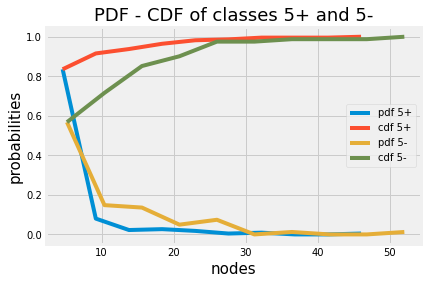

In [21]:
# Assembling two graphs

# surv
counts, bin_edges = np.histogram(survived.loc[:,'nodes'], bins=10, 
                                density=True)

pdf = counts / sum(counts)
cdf = np.cumsum(pdf)
print(pdf)
print(cdf)

plt.plot(bin_edges[1:], pdf, label='pdf 5+')
plt.plot(bin_edges[1:], cdf, label='cdf 5+')

# died
counts, bin_edges = np.histogram(died.loc[:,'nodes'], bins=10, 
                                density=True)

pdf = counts / (sum(counts))
cdf = np.cumsum(pdf)
print(pdf)
print(cdf)

plt.plot(bin_edges[1:], pdf, label='pdf 5-')
plt.plot(bin_edges[1:], cdf, label='cdf 5-')

plt.xlabel('nodes', fontsize=15)
plt.ylabel('probabilities', fontsize=15)
plt.title('PDF - CDF of classes 5+ and 5-',fontsize=18)
plt.legend()

plt.show()

* We see that from more than 25 nodes the 2 CDF curves of 5+ and 5- join and that the probability of survival reaches 0%

### Mean, Variance and Standard derviation

In [22]:
# mean
mean_surv = round(np.mean(survived.loc[:,'nodes']), 3)
mean_died = round(np.mean(died.loc[:,'nodes']), 3)
print(f"mean 5+ : {mean_surv}")
print(f"mean 5- : {mean_died}")

print()
# std
std_surv = round(np.std(survived.loc[:,'nodes']), 3)
std_died = round(np.std(died.loc[:,'nodes']), 3)
print(f"std 5+ : {std_surv}")
print(f"std 5- : {std_died}")

mean 5+ : 2.791
mean 5- : 7.457

std 5+ : 5.857
std 5- : 9.129


### Median, Percentile, Quantile, IQR, MAD

In [23]:
# media
med_surv = round(np.median(survived.loc[:,'nodes']), 3)
med_died = round(np.median(died.loc[:,'nodes']), 3)
print(f"median 5+ : {med_surv}")
print(f"median 5- : {med_died}")

print()
# quantils
q_surv = np.percentile(survived.loc[:,'nodes'], np.arange(0, 100, 25))
q_died = np.percentile(died.loc[:,'nodes'], np.arange(0, 100, 25))
print(f"percentile 5+ : {q_surv}")
print(f"percentile 5- : {q_died}")

print()

print("90th Percentiles:")
print(np.percentile(survived.loc[:,'nodes'],90))
print(np.percentile(died.loc[:,'nodes'],90))


median 5+ : 0.0
median 5- : 4.0

percentile 5+ : [0. 0. 0. 3.]
percentile 5- : [ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0


In [24]:
print ("Median Absolute Deviation (MAD)")
print(robust.mad(survived.loc[:,'nodes']))
print(robust.mad(died.loc[:,'nodes']))

Median Absolute Deviation (MAD)
0.0
5.930408874022408


### Distribution

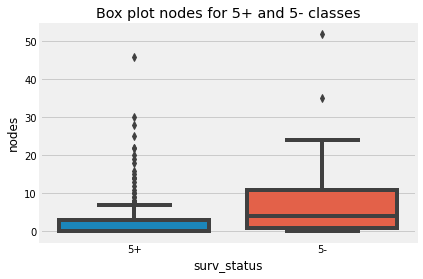

In [25]:
sns.boxplot(x='surv_status',y='nodes', data=haberman)
plt.title('Box plot nodes for 5+ and 5- classes')
plt.show()

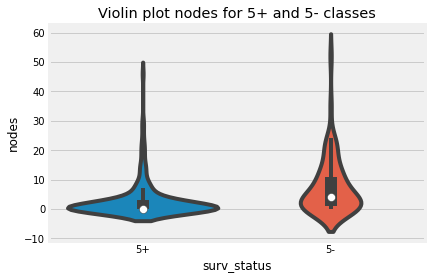

In [26]:
sns.violinplot(x="surv_status", y="nodes", data=haberman, height=10)
plt.title('Violin plot nodes for 5+ and 5- classes')
plt.show()

### Correlation

<AxesSubplot:>

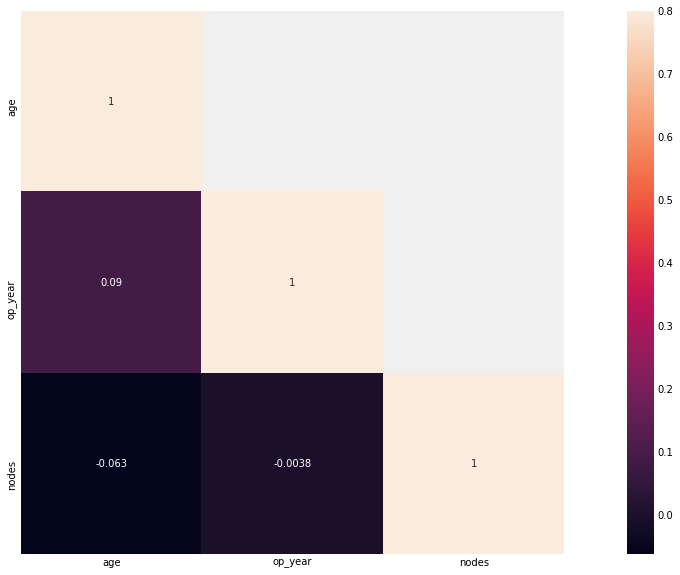

In [27]:
cor_mat = haberman.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cor_mat, mask=mask,vmax=.8, square=True,annot=True)

* There is absolutely no correlation between the features.

### Multivariate probability density, contour plot

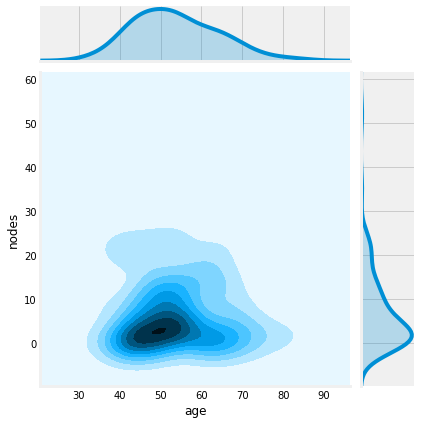

In [28]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="nodes", data=died, kind="kde");
plt.show();

patients in class 5- tend to be between 40 and 55 years old.

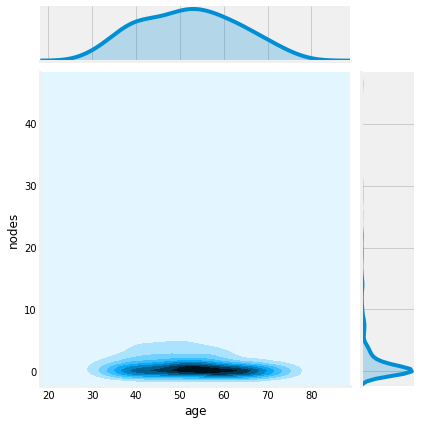

In [29]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="nodes", data=survived, kind="kde");
plt.show();

patients in class 5+ are rather condensed between 49 and 62 years old